In [1]:
import matplotlib.pyplot as plt
from sympy import *
from sympy.plotting import plot
from sympy.printing.latex import LatexPrinter
from sympy.core.function import _coeff_isneg, AppliedUndef, Derivative
from sympy.printing.precedence import precedence, PRECEDENCE
from spb import *
from scipy.integrate import quad
import numpy as np
import pandas as pd

In [2]:
class CustomPrint(LatexPrinter):
    def _print_Derivative(self, expr):
        diff_symbol = r'\partial'

        
        tex = "" 
        dim = 0
        for x, num in reversed(expr.variable_count):
            dim += num
            if num == 1:
                tex += r"%s %s" % (diff_symbol, self._print(x))
            else:
                tex += r"%s %s^{%s}" % (diff_symbol,
                                        self.parenthesize_super(self._print(x)),
                                        self._print(num))

        if dim == 1:
            tex = r"\frac{%s}{%s}" % (diff_symbol, tex) 
        else:
            tex = r"\frac{%s^{%s}}{%s}" % (diff_symbol, self._print(dim), tex) 

        if any(_coeff_isneg(i) for i in expr.args):
            return r"%s %s" % (tex, self.parenthesize(expr.expr,
                                                  PRECEDENCE["Mul"],
                                                  is_neg=True,
                                                  strict=True))

        return r"%s %s" % (tex, self.parenthesize(expr.expr,
                                                  PRECEDENCE["Mul"],
                                                  is_neg=False,
                                                  strict=True))
        
def custom_print_func(expr, **settings):
    return CustomPrint().doprint(expr)

In [3]:
init_printing(use_latex=True,latex_mode="plain",latex_printer=custom_print_func)
plt.rcParams['figure.figsize'] = 10, 8

In [4]:
a,b,C,d,e,f,q,p,R,MR,MC,tax = symbols('a b C d e f q p R MR MC tax')

###### Demand function (linear)

In [5]:
demand = Function('q')(p)
Eq(demand,a - b*p)
# Where q = quantity, a = demand parameter, b = demand parameter, p = price

###### Inverse demand function (linear)

In [6]:
inverse_demand = Function('p')(q)
Eq(inverse_demand,a/b - q/b)
# Where q = quantity, a = demand parameter, b = demand parameter, p = price

###### Costs

In [7]:
costs = Function('C')(q)
Eq(costs,d*q**2 + e*q + tax*q + f)
# Where q = quantity, d = costs parameter, e = costs parameter, f = costs parameter (fixed costs), tax = tax
# Note: in this case, tax is applied per unit

###### Marginal cost

In [8]:
marginal_cost = Function('MC')(q)
Eq(marginal_cost,diff(costs))

In [9]:
Eq(marginal_cost,diff(d*q**2 + e*q + tax*q + f,q))
# Where q = quantity, d = costs parameter, e = costs parameter

###### Revenue

In [10]:
revenue = Function('R')(q)
Eq(revenue,q*inverse_demand)

In [11]:
Eq(revenue,q*(a/b - q/b))
# Where q = quantity, a = demand parameter, b = demand parameter

##### Marginal revenue

In [12]:
marginal_revenue = Function('MR')(q)
Eq(marginal_revenue,diff(revenue))

In [13]:
Eq(marginal_revenue,diff(q*(a/b - q/b),q))
# Where q = quantity, a = demand parameter, b = demand parameter

### Classic monopoly without tax

In [14]:
# Lets assume the following parametres
ex_a_1 = 4
ex_b_1 = 0.2
ex_d_1 = 2
ex_e_1 = 3
ex_f_1 = 4
ex_tax_1 = 0

In [15]:
# Our demand function looks like this
demand = Function('q')(p)
Eq(demand,ex_a_1 - ex_b_1*p)

In [16]:
# Our inverse demand function looks like this
inverse_demand = Function('p')(q)
Eq(inverse_demand,ex_a_1/ex_b_1 - q/ex_b_1)

In [17]:
# Our costs function looks like this
costs = Function('C')(q)
Eq(costs,ex_d_1*q**2 + ex_e_1*q + ex_tax_1*q + ex_f_1)

In [18]:
# Our marginal costs function looks like this
revenue = Function('R')(q)
Eq(marginal_cost,diff(ex_d_1*q**2 + ex_e_1*q + ex_tax_1*q + ex_f_1,q))

In [19]:
# Our revenue function looks like this
revenue = Function('R')(q)
Eq(revenue,q*(ex_a_1/ex_b_1 - q/ex_b_1))

In [20]:
# Our marginal revenue function looks like this
marginal_revenue = Function('MR')(q)
Eq(marginal_revenue,diff(q*(ex_a_1/ex_b_1 - q/ex_b_1),q))

In [21]:
# We know our first order condition is
Eq(MR,MC)

In [22]:
# Which equals
Eq(diff(q*(ex_a_1/ex_b_1 - q/ex_b_1),q),diff(ex_d_1*q**2 + ex_e_1*q + ex_tax_1*q + ex_f_1,q))

In [23]:
eq_quantity_1 = solve(Eq(diff(q*(ex_a_1/ex_b_1 - q/ex_b_1),q),diff(ex_d_1*q**2 + ex_e_1*q + ex_tax_1*q + ex_f_1,q)))[0]
eq_quantity_1
# This is our equilibrium quantity, we have to introduce this value in the demand function to get the equilibrium price

In [24]:
eq_price_1 = ex_a_1/ex_b_1 - eq_quantity_1/ex_b_1
eq_price_1
# This is our equilibrium price

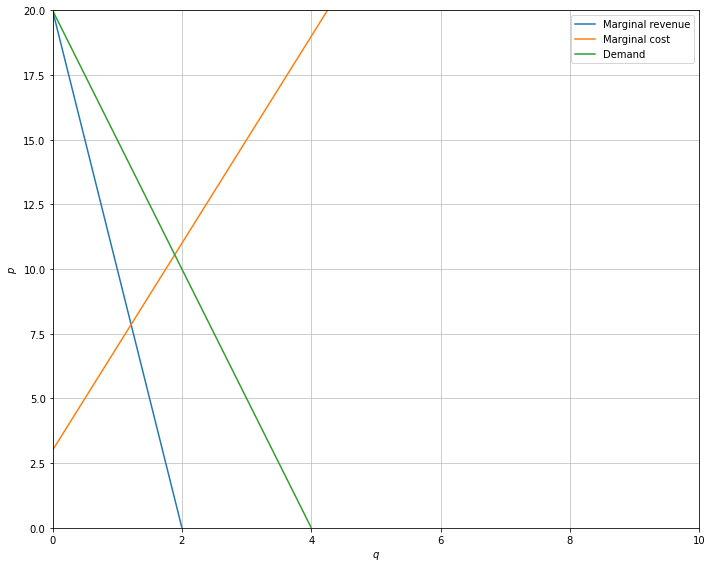

In [25]:
# Now we can see the graphic solution
p1 = plot_implicit(Eq(diff(q*(ex_a_1/ex_b_1 - q/ex_b_1),q),p),(q, 0, 10),(p, 0, 20),label = 'Marginal revenue',legend=True,show=False)
p2 = plot_implicit(Eq(diff(ex_d_1*q**2 + ex_e_1*q + ex_tax_1*q + ex_f_1,q),p),(q, 0, 10),(p, 0, 20),label = 'Marginal cost',legend=True,show=False)
p3 = plot_implicit(Eq(ex_a_1/ex_b_1 - q/ex_b_1,p),(q, 0, 10),(p, 0, 20),label = 'Demand',legend=True,show=False)
p1.append(p2[0])
p1.append(p3[0])
p1.show()
# Note: the quantity is determined by where the marginal cost curve cuts the marginal revenue curve
# Note: the price is determined by the value the demand curve has at the quantity determined previously

In [26]:
# Now we can calculate consumer and producer surplus
consumer_surplus_1 = ((ex_a_1/ex_b_1 - eq_price_1) * eq_quantity_1) / 2
producer_surplus_1 = ((eq_price_1 - (ex_e_1 + ex_tax_1)) * eq_quantity_1) / 2
print(f'Consumer surplus: {consumer_surplus_1}\nProducer surplus: {producer_surplus_1}')

Consumer surplus: 3.68622448979592
Producer surplus: 6.63520408163265


In [27]:
# We can also see the quantity and price of a competitive equilibrium
# This equilibrium occurs where the marginal cost curve meets the demand curve
Eq(MC,d)

In [28]:
# Which equals
Eq(diff(ex_d_1*q**2 + ex_e_1*q + ex_tax_1*q + ex_f_1,q),ex_a_1/ex_b_1 - q/ex_b_1)

In [29]:
comp_eq_quantity_1 = solve(Eq(diff(ex_d_1*q**2 + ex_e_1*q + ex_tax_1*q + ex_f_1,q),ex_a_1/ex_b_1 - q/ex_b_1))[0]
comp_eq_quantity_1
# We can see quantity traded is higher

In [30]:
comp_eq_price_1 = ex_a_1/ex_b_1 - comp_eq_quantity_1/ex_b_1
comp_eq_price_1
# We can see price is lower

In [31]:
# Lets calculate consumer and producer surplus in this case
comp_consumer_surplus_1 = ((ex_a_1/ex_b_1 - comp_eq_price_1) * comp_eq_quantity_1) / 2
comp_producer_surplus_1 = ((comp_eq_price_1 - (ex_e_1 + ex_tax_1)) * comp_eq_quantity_1) / 2
print(f'Consumer surplus: {comp_consumer_surplus_1}\nProducer surplus: {comp_producer_surplus_1}')
# Both consumer and producer are better in a competitve environment
# This means that producer would not choose the monopoly equilibrium

Consumer surplus: 8.91975308641975
Producer surplus: 7.13580246913580


### Classic monopoly with tax

In [32]:
# Lets assume the following parametres
ex_a_2 = 4
ex_b_2 = 0.2
ex_d_2 = 2
ex_e_2 = 3
ex_f_2 = 4
ex_tax_2 = 1

In [33]:
# Our demand function looks like this
demand = Function('q')(p)
Eq(demand,ex_a_2 - ex_b_2*p)

In [34]:
# Our inverse demand function looks like this
inverse_demand = Function('p')(q)
Eq(inverse_demand,ex_a_2/ex_b_2 - q/ex_b_2)

In [35]:
# Our costs function looks like this
costs = Function('C')(q)
Eq(costs,ex_d_2*q**2 + ex_e_2*q + ex_tax_2*q + ex_f_2)

In [36]:
# Our marginal costs function looks like this
revenue = Function('R')(q)
Eq(marginal_cost,diff(ex_d_2*q**2 + ex_e_2*q + ex_tax_2*q + ex_f_2,q))

In [37]:
# Our revenue function looks like this
revenue = Function('R')(q)
Eq(revenue,q*(ex_a_2/ex_b_2 - q/ex_b_2))

In [38]:
# Our marginal revenue function looks like this
marginal_revenue = Function('MR')(q)
Eq(marginal_revenue,diff(q*(ex_a_2/ex_b_2 - q/ex_b_2),q))

In [39]:
# We know our first order condition is
Eq(MR,MC)

In [40]:
# Which equals
Eq(diff(q*(ex_a_2/ex_b_2 - q/ex_b_2),q),diff(ex_d_2*q**2 + ex_e_2*q + ex_tax_2*q + ex_f_2,q))

In [41]:
eq_quantity_2 = solve(Eq(diff(q*(ex_a_2/ex_b_2 - q/ex_b_2),q),diff(ex_d_2*q**2 + ex_e_2*q + ex_tax_2*q + ex_f_2,q)))[0]
eq_quantity_2
# This is our equilibrium quantity, we have to introduce this value in the demand function to get the equilibrium price

In [42]:
eq_price_2 = ex_a_2/ex_b_2 - eq_quantity_2/ex_b_2
eq_price_2
# This is our equilibrium price
# Quantity traded is lower with tax, and price is higher

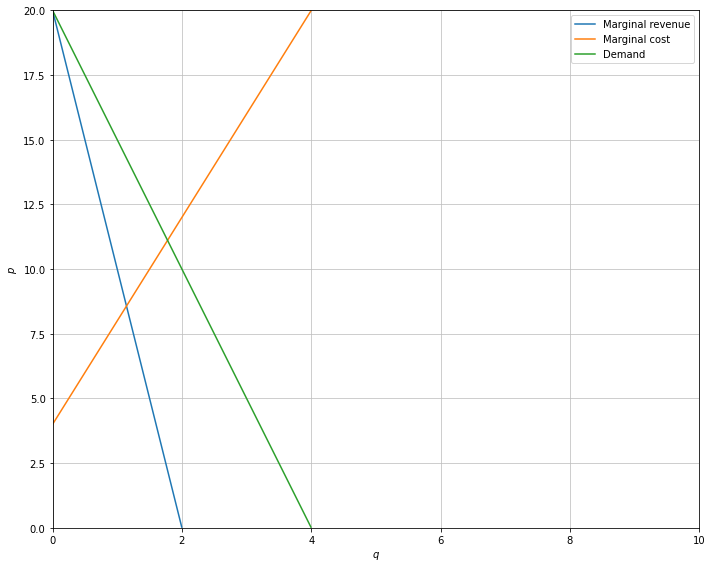

In [43]:
# Now we can see the graphic solution
p1 = plot_implicit(Eq(diff(q*(ex_a_2/ex_b_2 - q/ex_b_2),q),p),(q, 0, 10),(p, 0, 20),label = 'Marginal revenue',legend=True,show=False)
p2 = plot_implicit(Eq(diff(ex_d_2*q**2 + ex_e_2*q + ex_tax_2*q + ex_f_2,q),p),(q, 0, 10),(p, 0, 20),label = 'Marginal cost',legend=True,show=False)
p3 = plot_implicit(Eq(ex_a_2/ex_b_2 - q/ex_b_2,p),(q, 0, 10),(p, 0, 20),label = 'Demand',legend=True,show=False)
p1.append(p2[0])
p1.append(p3[0])
p1.show()
# Note: the quantity is determined by where the marginal cost curve cuts the marginal revenue curve
# Note: the price is determined by the value the demand curve has at the quantity determined previously

In [44]:
# Now we can calculate consumer and producer surplus
consumer_surplus_2 = ((ex_a_2/ex_b_2 - eq_price_2) * eq_quantity_2) / 2
producer_surplus_2 = ((eq_price_2 - (ex_e_2 + ex_tax_2)) * eq_quantity_2) / 2
print(f'Consumer surplus: {consumer_surplus_2}\nProducer surplus: {producer_surplus_2}')
# As we used the same parametres as in the no tax version, we can say both consumer and producer are worse with tax

Consumer surplus: 3.26530612244898
Producer surplus: 5.87755102040816


In [45]:
# We can also see the quantity and price of a competitive equilibrium
# This equilibrium occurs where the marginal cost curve meets the demand curve
Eq(MC,d)

In [46]:
# Which equals
Eq(diff(ex_d_2*q**2 + ex_e_2*q + ex_tax_2*q + ex_f_2,q),ex_a_2/ex_b_2 - q/ex_b_2)

In [47]:
comp_eq_quantity_2 = solve(Eq(diff(ex_d_2*q**2 + ex_e_2*q + ex_tax_2*q + ex_f_2,q),ex_a_2/ex_b_2 - q/ex_b_2))[0]
comp_eq_quantity_2
# We can see quantity traded is higher

In [48]:
comp_eq_price_2 = ex_a_2/ex_b_2 - comp_eq_quantity_2/ex_b_2
comp_eq_price_2
# We can see price is lower

In [49]:
# Lets calculate consumer and producer surplus in this case
comp_consumer_surplus_2 = ((ex_a_2/ex_b_2 - comp_eq_price_2) * comp_eq_quantity_2) / 2
comp_producer_surplus_2 = ((comp_eq_price_2 - (ex_e_2 + ex_tax_2)) * comp_eq_quantity_2) / 2
print(f'Consumer surplus: {comp_consumer_surplus_2}\nProducer surplus: {comp_producer_surplus_2}')
# Both consumer and producer are better in a competitve environment even with tax
# This means that producer would not choose the monopoly equilibrium

Consumer surplus: 7.90123456790123
Producer surplus: 6.32098765432099


In [50]:
# As we used the same parametres in both the no tax and tax version, we can calculate deadweight loss and tax revenue
deadweight_loss = (eq_price_2-eq_price_1)*(eq_price_2-eq_price_1)/2
print(f'Deadweight loss: {deadweight_loss}')

Deadweight loss: 0.0637755102040812


In [51]:
tax_rev = ex_tax_2 * eq_quantity_2
print(f'Tax revenue: {tax_rev}')

Tax revenue: 1.14285714285714


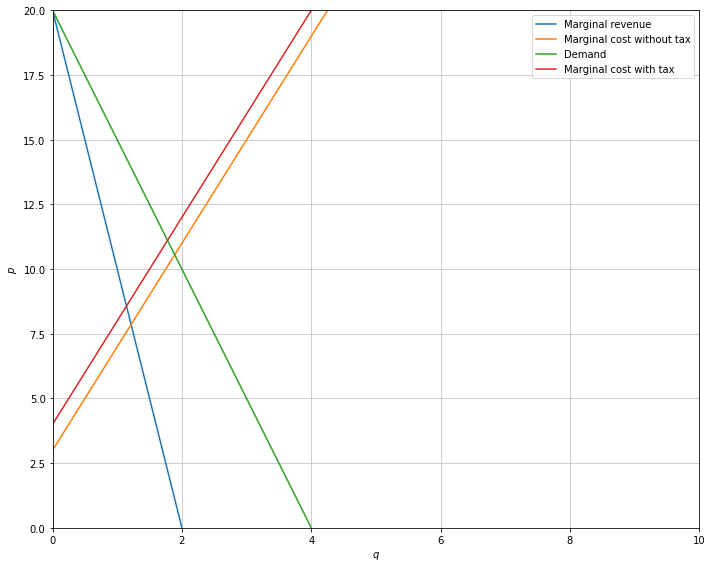

In [52]:
# We can see both examples together in a plot
p1 = plot_implicit(Eq(diff(q*(ex_a_1/ex_b_1 - q/ex_b_1),q),p),(q, 0, 10),(p, 0, 20),label = 'Marginal revenue',legend=True,show=False)
p2 = plot_implicit(Eq(diff(ex_d_1*q**2 + ex_e_1*q + ex_tax_1*q + ex_f_1,q),p),(q, 0, 10),(p, 0, 20),label = 'Marginal cost without tax',legend=True,show=False)
p3 = plot_implicit(Eq(ex_a_1/ex_b_1 - q/ex_b_1,p),(q, 0, 10),(p, 0, 20),label = 'Demand',legend=True,show=False)
p4 = plot_implicit(Eq(diff(ex_d_2*q**2 + ex_e_2*q + ex_tax_2*q + ex_f_2,q),p),(q, 0, 10),(p, 0, 20),label = 'Marginal cost with tax',legend=True,show=False)
p1.append(p2[0])
p1.append(p3[0])
p1.append(p4[0])
p1.show()